<a href="https://colab.research.google.com/github/paslariirina01-lab/git_workhard/blob/main/%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82_%22convnet_hw_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание: бинарная классификация отзывов с помощью CNN

Применить CNN для анализа тональности текста (положительный/отрицательный отзыв)

Заполните пропущенный код (`### ВАШ КОД ЗДЕСЬ ###`). **Не меняйте структуру ячеек!** Все ответы и графики должны генерироваться автоматически

**Критерии проверки (максимум 10 баллов):**
*   **2 балла** — корректная загрузка и предобработка данных.
*   **3 балла** — корректно собранная модель по спецификации.
*   **2 балла** — успешное обучение модели (вывод истории обучения).
*   **3 балла** — оценка на тесте и выводы (accuracy > 0.85 даёт +1 балл).

---

## БЛОК 1: Загрузка данных

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.ZSZMEY_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.ZSZMEY_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.ZSZMEY_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Тренировочные данные: 25000 samples
Тестовые данные: 25000 samples


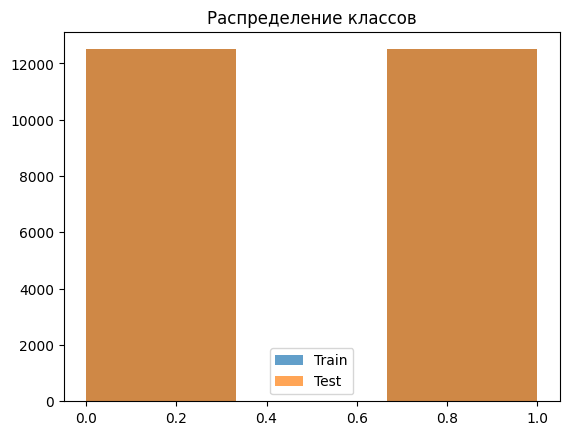

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

# 1. Загрузите датасет IMDB Reviews (бинарная классификация)
### ВАШ КОД ЗДЕСЬ ###
(train_data, test_data), info = tfds.load(
    'imdb_reviews',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)
# Используйте tfds.load('imdb_reviews', split=['train', 'test'], as_supervised=True)
# Преобразуйте данные в numpy массивы (x_train, y_train), (x_test, y_test)
x_train, y_train = [], []
for text, label in tfds.as_numpy(train_data):
    x_train.append(text)
    y_train.append(label)

x_test, y_test = [], []
for text, label in tfds.as_numpy(test_data):
    x_test.append(text)
    y_test.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

print(f"Тренировочные данные: {len(x_train)} samples")
print(f"Тестовые данные: {len(x_test)} samples")

# 2. Визуализируйте распределение классов
plt.hist(y_train, bins=3, alpha=0.7, label='Train')
plt.hist(y_test, bins=3, alpha=0.7, label='Test')
plt.legend()
plt.title('Распределение классов')
plt.show()

## БЛОК 2: Предобработка текста

In [9]:
# 3. Создайте текстовый векторзатор (TextVectorization)
# Ограничьте словарь 10_000 самых частых слов, максимальную длину последовательности — 200 слов
vectorizer = keras.layers.TextVectorization(
    max_tokens=10_000,
    output_sequence_length=200
)
# vectorizer = keras.layers.TextVectorization(max_tokens=..., output_sequence_length=...)

# 4. Адаптируйте векторзатор на тренировочных текстах
vectorizer.adapt(x_train)
# vectorizer.adapt(...)

# 5. Примените векторзацию к данным
x_train_vec = vectorizer(x_train).numpy()
x_test_vec = vectorizer(x_test).numpy()

print(f"Размерность после векторизации: {x_train_vec.shape}")

Размерность после векторизации: (25000, 200)


## БЛОК 3: Построение модели

In [11]:
# 6. Постройте модель CNN для текста СТРОГО ПО СПЕЦИФИКАЦИИ:
#    - Вход: векторная последовательность (200,)
#    - Embedding: размерность 128, входной словарь 10_000
#    - Conv1D: 64 фильтра, размер ядра 5, активация 'relu'
#    - GlobalMaxPooling1D
#    - Dense: 32 нейрона, 'relu'
#    - Dense: 1 нейрон, 'sigmoid' (бинарная классификация)
### ВАШ КОД ЗДЕСЬ ###
# model = keras.Sequential([...])

model = keras.Sequential([
    keras.layers.Embedding(
        input_dim=10_000,
        output_dim=128,
        input_length=200
    ),
    keras.layers.Conv1D(
        filters=64,
        kernel_size=5,
        activation='relu'
    ),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.build(input_shape=(None, 200))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 196, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,323,137 (5.05 MB)

 Trainable params: 1,323,137 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

## БЛОК 4: Обучение

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 47ms/step - accuracy: 0.6881 - loss: 0.5506 - precision: 0.6671 - recall: 0.6633 - val_accuracy: 0.8516 - val_loss: 0.3373 - val_precision: 0.8096 - val_recall: 0.9241
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.9199 - loss: 0.2111 - precision: 0.9170 - recall: 0.9235 - val_accuracy: 0.8740 - val_loss: 0.3142 - val_precision: 0.8706 - val_recall: 0.8823
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.9909 - loss: 0.0478 - precision: 0.9900 - recall: 0.9917 - val_accuracy: 0.8712 - val_loss: 0.3759 - val_precision: 0.8608 - val_recall: 0.8894
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9996 - loss: 0.0078 - precision: 0.9991 - recall: 1.0000 - val_accuracy: 0.8734 - val_loss: 0.4321 - val_precision: 0.8628 - val_recall: 0.8917
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.9999 - loss: 0.0022 - precision: 0.9998 - recall: 1.0000 - val_accuracy: 0.8726 - val_los

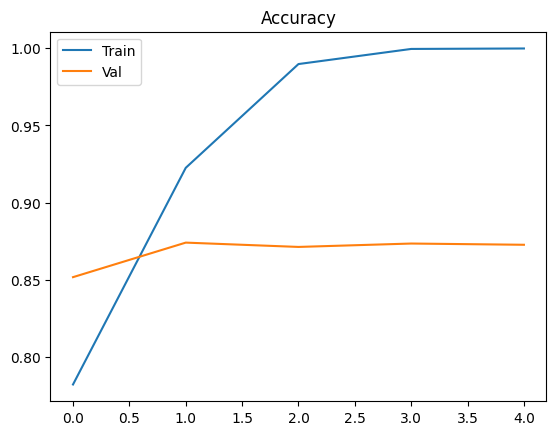

In [12]:
# 7. Скомпилируйте модель с оптимизатором 'adam', функцией потерь 'binary_crossentropy',
#    метриками ['accuracy', 'Precision', 'Recall']
### ВАШ КОД ЗДЕСЬ ###
# model.compile(...)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]
)

# 8. Обучите модель на 5 эпох с validation_split=0.2, batch_size=32
### ВАШ КОД ЗДЕСЬ ###
# history = model.fit(...)
history = model.fit(
    x_train_vec,
    y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)

# 9. Постройте график точности (accuracy) на обучении и валидации
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()
plt.show()

## БЛОК 5: Оценка

In [13]:
# 10. Оцените модель на тестовых данных
### ВАШ КОД ЗДЕСЬ ###
# test_loss, test_acc, test_prec, test_rec = model.evaluate(...)
test_loss, test_acc, test_prec, test_rec = model.evaluate(
    x_test_vec,
    y_test,
    verbose=0
)
print(f"Тестовая accuracy: {test_acc:.4f}")
print(f"Тестовая precision: {test_prec:.4f}")
print(f"Тестовая recall: {test_rec:.4f}")

# 11. Сделайте предсказания на первых 10 тестовых отзывах
#     и выведите: текст отзыва, истинный класс, предсказанный класс, вероятность
for i in range(10):
    text = x_test[i]
    true_label = "POS" if y_test[i] == 1 else "NEG"
    ### ВАШ КОД ЗДЕСЬ ###
    # pred_prob = model.predict(...)
    # pred_label = "POS" if pred_prob > 0.5 else "NEG"
    pred_prob = model.predict(
        x_test_vec[i:i+1],
        verbose=0
    )
    pred_label = "POS" if pred_prob[0][0] > 0.5 else "NEG"
    print(f"{text[:50]}... | True: {true_label} | Pred: {pred_label} ({pred_prob[0][0]:.2f})")

Тестовая accuracy: 0.8668
Тестовая precision: 0.8670
Тестовая recall: 0.8666
b'There are films that make careers. For George Rome'... | True: POS | Pred: POS (1.00)
b'A blackly comic tale of a down-trodden priest, Naz'... | True: POS | Pred: NEG (0.23)
b'Scary Movie 1-4, Epic Movie, Date Movie, Meet the '... | True: NEG | Pred: NEG (0.00)
b'Poor Shirley MacLaine tries hard to lend some grav'... | True: NEG | Pred: NEG (0.01)
b'As a former Erasmus student I enjoyed this film ve'... | True: POS | Pred: POS (1.00)
b'My God, Ryan Gosling has made a lot of deep charac'... | True: POS | Pred: POS (1.00)
b'This film just won the best film award at the Clev'... | True: POS | Pred: POS (1.00)
b'The cast for this production of Rigoletto is excel'... | True: POS | Pred: POS (1.00)
b'As long as you keep in mind that the production of'... | True: NEG | Pred: NEG (0.40)
b'Every great once in a while, you stumble upon a mo'... | True: POS | Pred: NEG (0.00)


## БЛОК 6: Выводы

**Ответьте на вопросы в этой ячейке (текстом):**

1.  Какая итоговая точность (accuracy) на тесте?
2.  Что показывает разница между точностью на обучении и валидации? Есть ли переобучение?
3.  Какой из 10 показанных отзывов был классифицирован неверно? Почему, на ваш взгляд?

**Мои ответы:**
1.  Итоговая точность: accuracy: 0.8668
Что говорит о том, что модель корректно клаффицирует примерно 86.7% отзывов, а значения precision: 0.8670 и recall: 0.8666, практически совпадают, значит модель работает сбалансированно для обоих классов (POS / NEG).
2.  По графику trаin и val видно, что точность на обучении растет почти до 1.0, а точность на валидации стабилизируется около 0.87. Это говорит о том, что модель хорошо запоминает обущающие данные, но обобщающая способность ограничена.Переобучение присутствует, так как заметен большой разрывмежду trаin и val.
3. На мой взгляд мог быть классифицирован неверно следующий отзыв: 'A blackly comic tale of a down-trodden priest, Naz'... | True: POS | Pred: NEG (0.23)
Позитивная оценка выражена неявно, сложная лексика.